# Regresión Lineal 


Tutorial de regresión lineal utilizando batch gradient descent, stochastic gradient descent y mini-batch gradient descent.

In [102]:
import sklearn
import numpy as np

import matplotlib.pyplot as plt


In [103]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[0, 2, 0, 15]

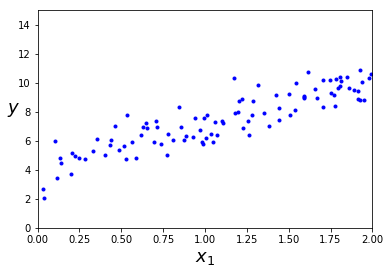

In [104]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

## Batch gradient descent

In [262]:
alpha = 0.1
n_iterations = 1000
m = len(X)

theta = np.random.randn(2,1)
theta

array([[-0.15189757],
       [-2.46632115]])

Text(0,0.5,'$y$')

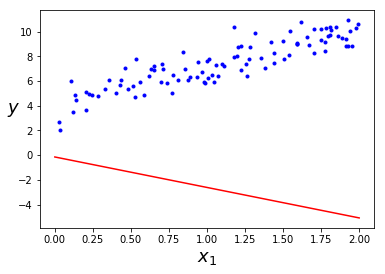

In [263]:
X_new = np.linspace(0,2,2)
y_new = theta[0]+ x_new*theta[1]


plt.plot(X, y, "b.")
plt.plot(x_new, y_new, '-r')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([0, 2, -4, 15])

In [264]:
X_b = np.c_[np.ones((len(X),1)), X]

for iteration in range(n_iterations):
    gradient = np.dot(X_b.T, np.dot(X_b, theta) - y) / m
    theta = theta - alpha * gradient

In [265]:
theta

array([[4.0785884 ],
       [3.06725191]])

Text(0,0.5,'$y$')

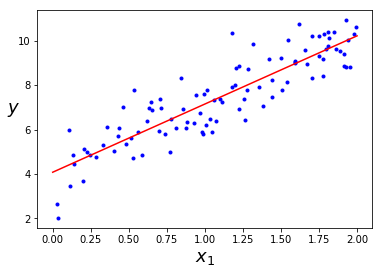

In [266]:
X_new = np.linspace(0,2,2)
y_new = theta[0]+ x_new*theta[1]


plt.plot(X, y, "b.")
plt.plot(x_new, y_new, '-r')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

## ¿Qué ocurre si cambiamos el learning rate?

In [331]:
def plot_bgd(theta, alpha, path_theta_bgd=None):
    iteration = 0
    plt.plot(X, y, 'b.')
    for iteration in range(n_iterations):
        if iteration < 10:
            y_new = theta[0]+ x_new*theta[1]
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_new, style)
        gradient = np.dot(X_b.T, np.dot(X_b, theta) - y) / m
        theta = theta - alpha * gradient
        if path_theta_bgd is not None:
            path_theta_bgd.append(theta)
    y_new = theta[0]+ x_new*theta[1]
    plt.plot(x_new, y_new, style, c='r')
    plt.xlabel('$x_1$', fontsize=16)
    plt.axis([0, 2, 0, 15])
    plt.title("Learning rate = {}".format(alpha), fontsize=16)
    if path_theta_bgd is not None:
        return path_theta_bgd

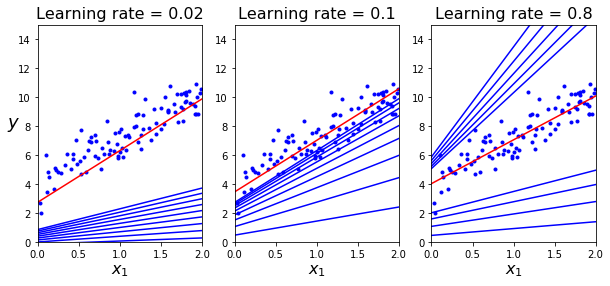

In [332]:
theta = np.random.randn(2,1) 

plt.figure(figsize=(10,4))
plt.subplot(131); plot_bgd(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_bgd(theta, alpha=0.1)
plt.subplot(133); plot_bgd(theta, alpha=0.8)

## Stochastic gradient descent

In [358]:
n_iterations = 50
alpha = 0.001

def plot_sgd(theta, alpha, path_theta_sgd=None):
    iteration = 0
    plt.plot(X, y, 'b.')
    for iteration in range(n_iterations):
        if iteration < 10:
            y_new = theta[0]+ x_new*theta[1]
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_new, style)
        for i in range(m):
            gradient = np.dot(X_b[i].reshape(2,1), np.dot(X_b[i], theta) - y[i])
            theta = theta - alpha * gradient.reshape(2,1)
            if path_theta_sgd is not None:
                path_theta_sgd.append(theta)
    y_new = theta[0]+ x_new*theta[1]
    plt.plot(x_new, y_new, style, c='r')
    plt.xlabel('$x_1$', fontsize=16)
    plt.axis([0, 2, 0, 15])
    plt.title("Learning rate = {}".format(alpha), fontsize=16)
    if path_theta_sgd is not None:
        return path_theta_sgd

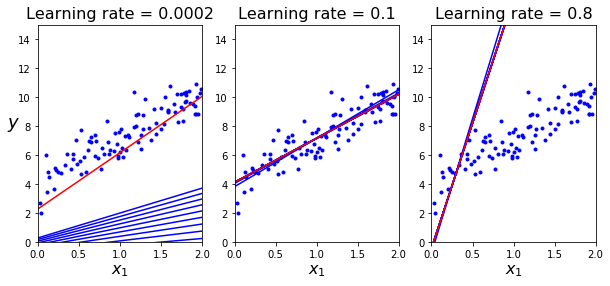

In [369]:
theta = np.random.randn(2,1) 

plt.figure(figsize=(10,4))
plt.subplot(131); plot_sgd(theta, alpha=0.0002)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_sgd(theta, alpha=0.1)
plt.subplot(133); plot_sgd(theta, alpha=0.8)

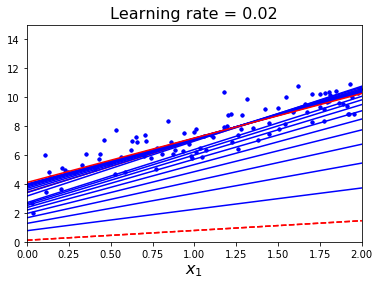

In [366]:
path_theta_bgd = plot_bgd(theta, alpha=0.1, path_theta_bgd=[])
path_theta_sgd = plot_sgd(theta, alpha=0.02, path_theta_sgd=[])

In [367]:
path_theta_sgd = np.array(path_theta_sgd)
path_theta_bgd = np.array(path_theta_bgd)

[2.5, 4.5, 2.3, 3.9]

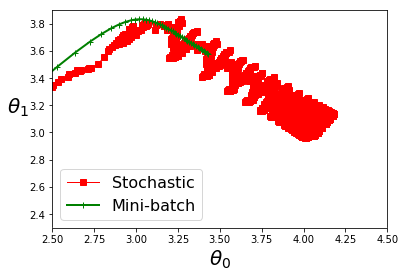

In [368]:
plt.plot(path_theta_sgd[:, 0], path_theta_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(path_theta_bgd[:, 0], path_theta_bgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc='best', fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])



![Never](g_min.jpg)

## Regresión Polinomial

In [456]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

[-3, 3, 0, 10]

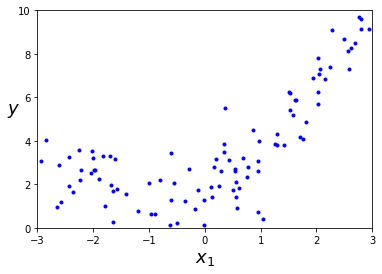

In [457]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [458]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)

In [459]:
print(X[0])
print(X_poly[0])

[-1.56921429]
[ 1.         -1.56921429  2.46243349]


In [460]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.85145554]), array([[0.        , 1.05488493, 0.57760918]]))

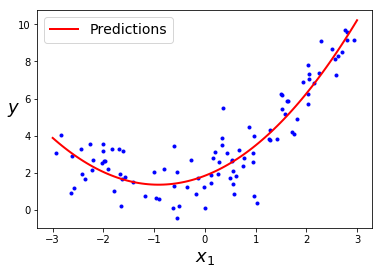

In [464]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

[-3, 3, -2.5, 10]

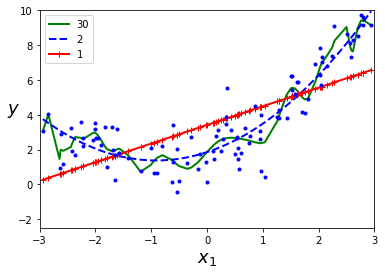

In [484]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)


for style, degree in (("g-", 30), ("b--", 2), ("r-+", 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    
    X_new_poly = poly_features.transform(np.sort(X, axis=0))
    y_pred = lin_reg.predict(X_new_poly)
    plt.plot(np.sort(X, axis=0), y_pred, style, label=str(degree), linewidth=width)
    
    #X_new_poly = poly_features.transform(X_new)
    #y_pred = lin_reg.predict(X_new_poly)
    #plt.plot(X_new, y_pred, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -2.5, 10])

## Modelos regularizados

In [495]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


In [496]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

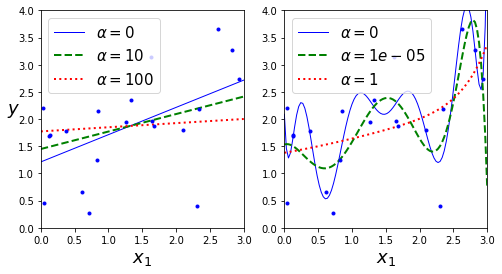

In [497]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

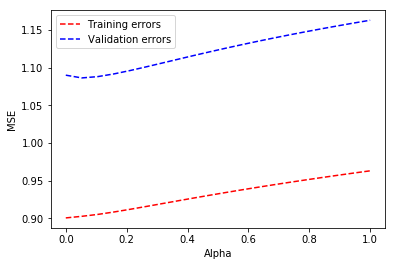

In [546]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 2 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)


poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])


train_errors = []
val_errors = []
alphas = np.linspace(0, 1, 20)
for alpha in alphas:
    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled = poly_scaler.transform(X_val)
    
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = ridge_reg.predict(X_train_poly_scaled)
    train_error = mean_squared_error(y_train, y_train_predict)
    train_errors.append(train_error)
    
    y_val_predict = ridge_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)
    

plt.plot(alphas, train_errors, "r--", label='Training errors')
plt.plot(alphas, val_errors, "b--", label='Validation errors')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend(loc='best')


[0, 0.2, 1.08, 1.1]

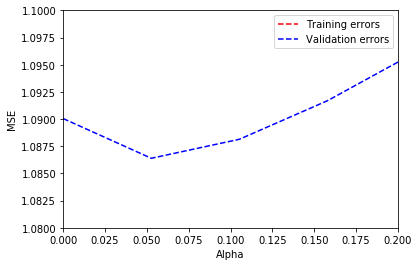

In [548]:
plt.plot(alphas, train_errors, "r--", label='Training errors')
plt.plot(alphas, val_errors, "b--", label='Validation errors')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.axis([0, 0.2, 1.08, 1.10])